## Leitura e Preprocessamento dos Dados

### Requirements

In [159]:
import pandas as pd
import numpy as np
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import altair as alt


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Leitura e Concatenação 

In [8]:
path = os.getcwd()
files = glob.glob(os.path.join(path, "output/*/*.json"))

In [9]:
jsons = [pd.read_json(file, lines=True) for file in files]
df = pd.concat(jsons, ignore_index=True)

df["subject"] = [os.path.split(os.path.dirname(file))[-1] for file in files]

In [10]:
df

,title,abstract,subject
0,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
1,Aplicação de machine learning para apostas esp...,As práticas esportivas surgiram de atividades ...,machinelearning
2,Social machines: a unified paradigm to describ...,"The open, distributed approach of the Web and ...",machinelearning
3,Um método de aprendizagem seqüencial com filtr...,"Em aplicações de aprendizagem de máquina, é co...",machinelearning
4,Development of machine and deep learning based...,Artificial intelligence-based algorithms have ...,machinelearning
5,Automação de controle de acesso por reconhecim...,Esta pesquisa tem como objetivo propor um méto...,machinelearning
6,Visão computacional aplicada a gestão da manut...,O desgaste progressivo de peças rotativas como...,machinelearning
7,A machine learning-based methodology for autom...,Oil refineries process hazardous substances at...,machinelearning
8,Time Aware Sigmoid Optimization : a new learni...,The correct choice of hyperparameters for the ...,machinelearning
9,Time series forecasting with deep forest regre...,A time series is a collection of ordered obser...,machinelearning


In [11]:
df.describe()

,title,abstract,subject
count,50,50,50
unique,50,50,5
top,Modelagem de reforma catalítica seca de metano...,Estamos vivenciando o início da Era da Informa...,machinelearning
freq,1,1,10


### Stopwords

English and portuguese

In [22]:
languages = ['english', 'portuguese']

In [23]:
list_stop = stopwords.words(languages)
print(list_stop[:10])
print(list_stop[-10:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['tivessem', 'tivéssemos', 'tu', 'tua', 'tuas', 'um', 'uma', 'você', 'vocês', 'vos']


### Preprocessing

In [80]:
corpus = df['abstract'].copy()
preprocessed_corpus = []

for abstract in corpus:
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(abstract))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    #Normalize
    document = unidecode(document)
    
    document = document.split()
    
    document = [word for word in document if word not in list_stop and word.isalpha()]
    
    document = " ".join(document)
        
    preprocessed_corpus.append(document)

In [81]:
print(len(corpus))
print(len(preprocessed_corpus))

50
50


### Feature Extration

In [164]:
count_vect = CountVectorizer(stop_words=list_stop, min_df=0.05, max_df=0.99)
count_vect.fit(preprocessed_corpus)

CountVectorizer(max_df=0.99, min_df=0.05,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [165]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  489
Quantidade total de palavras:  119316


#### TF-IDF

In [166]:
X = count_vect.transform(preprocessed_corpus)

In [167]:
X.shape

(50, 489)

In [168]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [169]:
X_tfidf = tfidf_transformer.transform(X)

In [170]:
X_tfidf.shape

(50, 489)

In [171]:
count_vect.get_feature_names_out()

array(['abordagem', 'abordagens', 'acerca', 'acesso', 'acoes', 'acordo',
       'adultos', 'agrupamento', 'ainda', 'alem', 'algumas', 'alguns',
       'alta', 'alteracoes', 'alto', 'ambiente', 'ambos', 'analisada',
       'analisadas', 'analisados', 'analisar', 'analise', 'analises',
       'ano', 'anos', 'apenas', 'apesar', 'aplicacao', 'apontam', 'apos',
       'aprendizagem', 'apresenta', 'apresentam', 'apresentando',
       'apresentar', 'apresentaram', 'aproximadamente', 'area', 'areas',
       'arquitetos', 'arquitetura', 'arte', 'artes', 'artigos',
       'artisticos', 'aspectos', 'assim', 'ate', 'atencao', 'atividade',
       'atividades', 'atlantica', 'atraves', 'aumento', 'avaliados',
       'avaliar', 'avanco', 'baixa', 'baixo', 'base', 'bases', 'bem',
       'bens', 'boa', 'brasil', 'brasileira', 'brasileiras', 'brasileiro',
       'brasileiros', 'cada', 'campo', 'capacidade', 'capital',
       'caracteristicas', 'caso', 'cenario', 'cidade', 'cinco',
       'coletados', 'co

### Análise das Caracteristicas textuais

In [172]:
sorted_X_indices = np.argsort(X.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices = np.argsort(X_tfidf.toarray(), axis=1)[:,::-1]

print('Termos mais comuns nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_X_indices[i, :3]])

print('\nTermos mais relevantes nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf = X_tfidf.mean(axis=0)
sorted_meanXtfidf_indices = np.argsort(mean_Xtfidf)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices[:3]])

Termos mais comuns nos 10 primeiros documentos:
['modelos' 'processos' 'podem']
['dados' 'regressao' 'resultados']
['social' 'machines' 'software']
['metodo' 'aprendizagem' 'learning']
['context' 'support' 'learning']
['atraves' 'metodo' 'acesso']
['imagens' 'meio' 'learning']
['svm' 'way' 'used']
['network' 'learning' 'three']
['series' 'time' 'performance']

Termos mais relevantes nos 10 primeiros documentos:
['modelos' 'processos' 'podem']
['regressao' 'dados' 'possivel']
['social' 'machines' 'software']
['aprendizagem' 'metodo' 'proposto']
['context' 'support' 'models']
['software' 'acesso' 'feita']
['imagens' 'meio' 'network']
['svm' 'way' 'used']
['network' 'three' 'different']
['series' 'time' 'performance']

Termos mais relevantes na base de dados:
[['si' 'hipoteses' 'avaliados' 'sugere' 'polimorficos' 'contudo' 'alguns'
  'novo' 'relevante' 'adultos' 'varios' 'sanitario' 'distrito' 'oferecer'
  'paraiba' 'condicao' 'acoes' 'natureza' 'incluindo' 'finalidade'
  'apresentando' '

### Visualisation

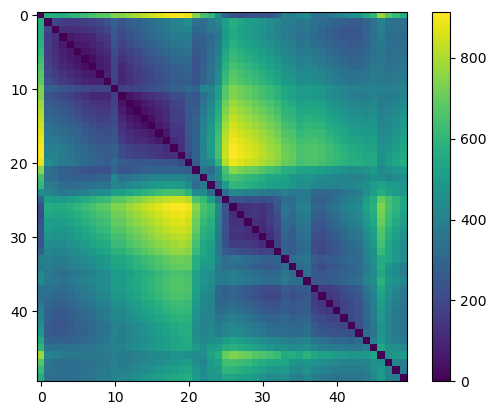

In [173]:
p = pairwise_distances(np.argsort(X_tfidf.toarray(), axis=0)[:,::-1], metric='euclidean')
plt.imshow(p, interpolation='nearest')
plt.colorbar()

In [174]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=df['title'], columns=count_vect.get_feature_names_out())
tfidf_df.head()

,abordagem,abordagens,acerca,acesso,acoes,acordo,adultos,agrupamento,ainda,alem,...,variaveis,varios,vector,vem,verificar,verificou,vez,vida,vista,way
title,,,,,,,,,,,,,,,,,,,,,
"Modelagem de reforma catalítica seca de metano a gás de síntese, utilizando machine learning e redes neurais",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041478,...,0.062318,0.073997,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
"Aplicação de machine learning para apostas esportivas: uso de regressão logística, SVM, árvore de decisão e Naive Bayes",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058218,...,0.000000,0.000000,0.000000,0.0,0.091984,0.0,0.0,0.097325,0.0,0.000000
"Social machines: a unified paradigm to describe, design and implement emerging social systems",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.093659
Um método de aprendizagem seqüencial com filtro de Kalman e Extreme Learning Machine para problemas de regressão e previsão de séries temporais,0.073408,0.082887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046461,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
Development of machine and deep learning based models for risk and reliability problems,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.157264,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [175]:
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df.head()

,title,level_1,0
0,Modelagem de reforma catalítica seca de metano...,abordagem,0.0
1,Modelagem de reforma catalítica seca de metano...,abordagens,0.0
2,Modelagem de reforma catalítica seca de metano...,acerca,0.0
3,Modelagem de reforma catalítica seca de metano...,acesso,0.0
4,Modelagem de reforma catalítica seca de metano...,acoes,0.0


In [179]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'title': 'document','level_1': 'term', 'level_2': 'term'})
tfidf_df

,document,term,tfidf
0,Modelagem de reforma catalítica seca de metano...,abordagem,0.000000
1,Modelagem de reforma catalítica seca de metano...,abordagens,0.000000
2,Modelagem de reforma catalítica seca de metano...,acerca,0.000000
3,Modelagem de reforma catalítica seca de metano...,acesso,0.000000
4,Modelagem de reforma catalítica seca de metano...,acoes,0.000000
...,...,...,...
24445,Desenvolvimento neuropiscomotor: Importância d...,verificou,0.000000
24446,Desenvolvimento neuropiscomotor: Importância d...,vez,0.000000
24447,Desenvolvimento neuropiscomotor: Importância d...,vida,0.000000
24448,Desenvolvimento neuropiscomotor: Importância d...,vista,0.085792


In [177]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf

,document,term,tfidf
8834,A competitividade internacional das Commoditie...,apresentam,0.320215
8868,A competitividade internacional das Commoditie...,brasileiras,0.320215
9109,A competitividade internacional das Commoditie...,novos,0.300062
8867,A competitividade internacional das Commoditie...,brasileira,0.269673
8981,A competitividade internacional das Commoditie...,estudo,0.166251
...,...,...,...
3327,Visão computacional aplicada a gestão da manut...,recursos,0.211323
3178,Visão computacional aplicada a gestão da manut...,learning,0.186080
3185,Visão computacional aplicada a gestão da manut...,machine,0.186080
3041,Visão computacional aplicada a gestão da manut...,dados,0.127132


In [182]:
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)